# UseCase Unit II
### Name: Adiel Nefthali Delgado Silva

### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the Dataset

In [4]:
df = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

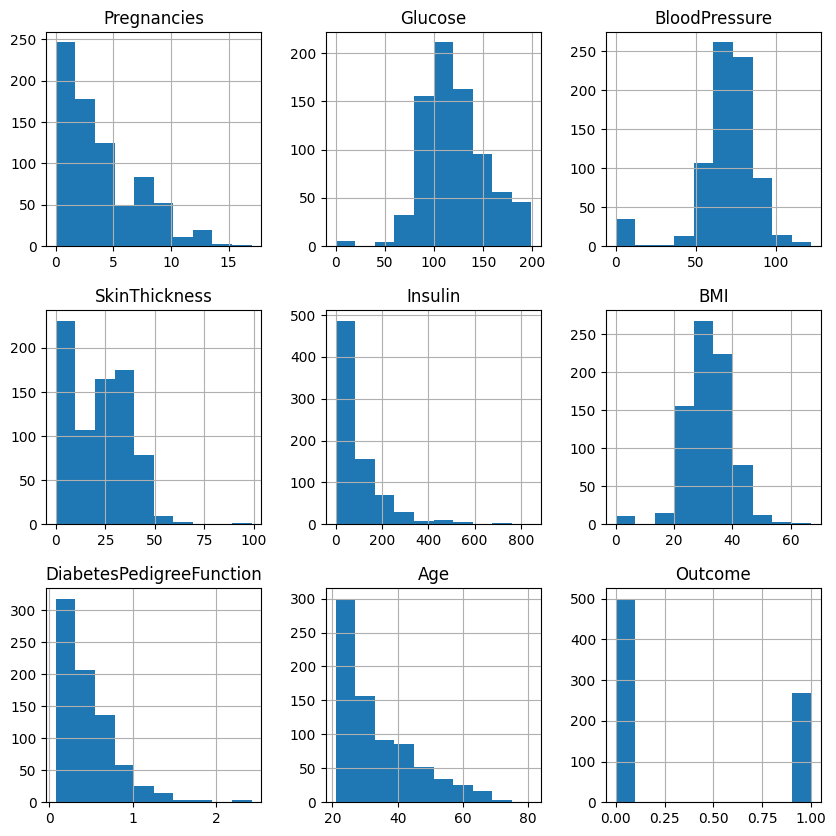

In [8]:
# Distribución de Cada Característica (Histogramas)
df.hist(figsize=(10,10))

#### Distribuciones:
-   Sesgadas a la Derecha: Las variables Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction y Age muestran un claro sesgo a la derecha. Esto significa que la mayoría de los pacientes tienen valores bajos en estas características, pero hay unos pocos con valores significativamente altos.

-   Aproximadamente Normales: Glucose, BloodPressure y BMI parecen tener una distribución que se asemeja a una campana (distribución normal)

-   Binaria: La variable Outcome no es continua, sino binaria (solo toma valores de 0 o 1).

#### Análisis Descriptivo Inicial

Las variables Insulin, DiabetesPedigreeFunction, SkinThickness y Age presentan una cantidad considerable de valores atípicos

Las columnas Glucose, BloodPressure, SkinThickness, Insulin y BMI contienen ceros que representan datos faltantes.

El método .info() muestra que no hay valores "nulos" explícitos

#### Creating the Re-Usable Functions

In [9]:
def plot_class_imbalance(target_var, title):
    #Visualiza el balance de clases de la variable objetivo.

    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_var, data=df)
    plt.title(title)
    plt.show()

def plot_univariate_analysis(var, var_title):
    #Realiza un análisis univariado mostrando un boxplot, histograma y curva de densidad.

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f"Análisis Univariado de {var_title}", fontsize=16)

    # Boxplot para identificar outliers
    sns.boxplot(data=df, y=var, ax=ax[0])
    ax[0].set_ylabel(var_title)
    ax[0].set_title("Boxplot")

    # Histograma para ver la distribución
    sns.histplot(data=df, x=var, ax=ax[1])
    ax[1].set_xlabel(var_title)
    ax[1].set_title("Histograma")

    # Curva de densidad (KDE)
    sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
    ax[2].set_xlabel(var_title)
    ax[2].set_title("Curva de Densidad")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_correlation_heatmap(data, title):
    # Visualiza la matriz de correlación de los datos.
    
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

def plot_feature_vs_outcome(feature_var, feature_title):
    #Compara la distribución de una característica para cada valor de la variable objetivo.
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribución de {feature_title} vs. Outcome", fontsize=16)
    
    # Boxplot
    sns.boxplot(data=df, x='Outcome', y=feature_var, ax=ax[0])
    ax[0].set_xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
    ax[0].set_ylabel(feature_title)
    ax[0].set_title("Boxplot Comparativo")

    # KDE Plot
    sns.kdeplot(data=df, x=feature_var, hue='Outcome', fill=True, ax=ax[1])
    ax[1].set_xlabel(feature_title)
    ax[1].set_title("Curva de Densidad Comparativa")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

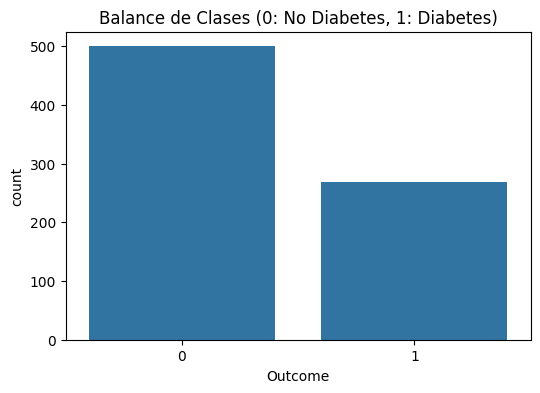

In [10]:
# 1. Gráfico de desbalance de clases para 'Outcome'
plot_class_imbalance('Outcome', 'Balance de Clases (0: No Diabetes, 1: Diabetes)')

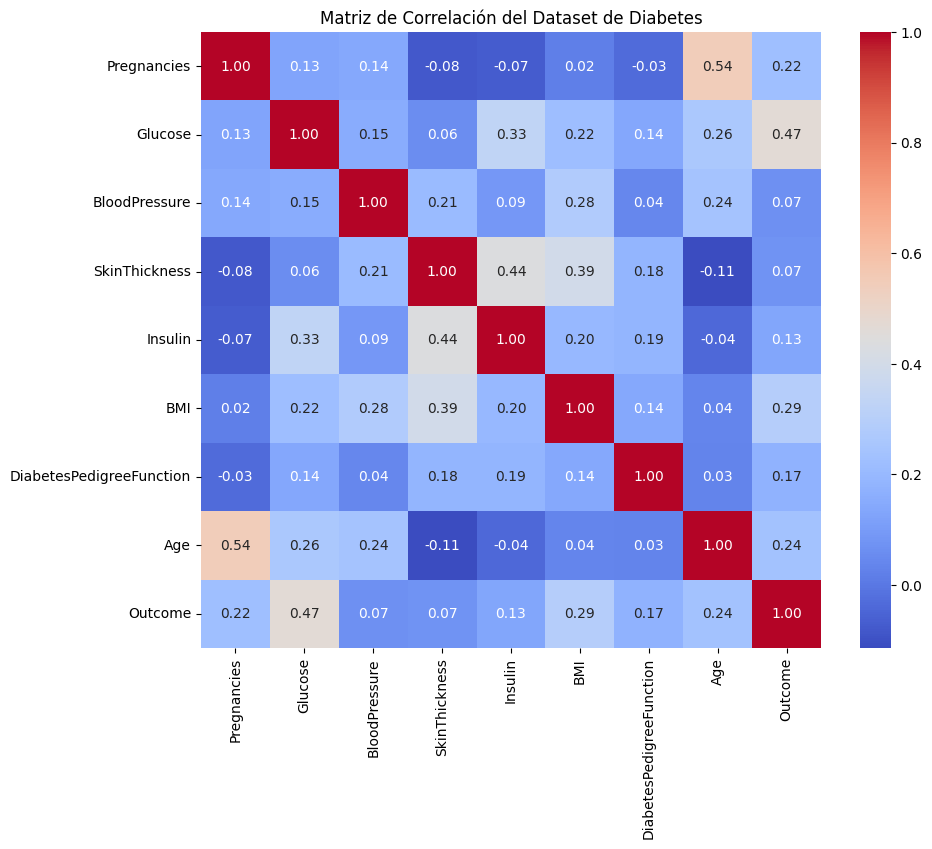

In [11]:
# 2. Matriz de correlación
plot_correlation_heatmap(df, 'Matriz de Correlación del Dataset de Diabetes')

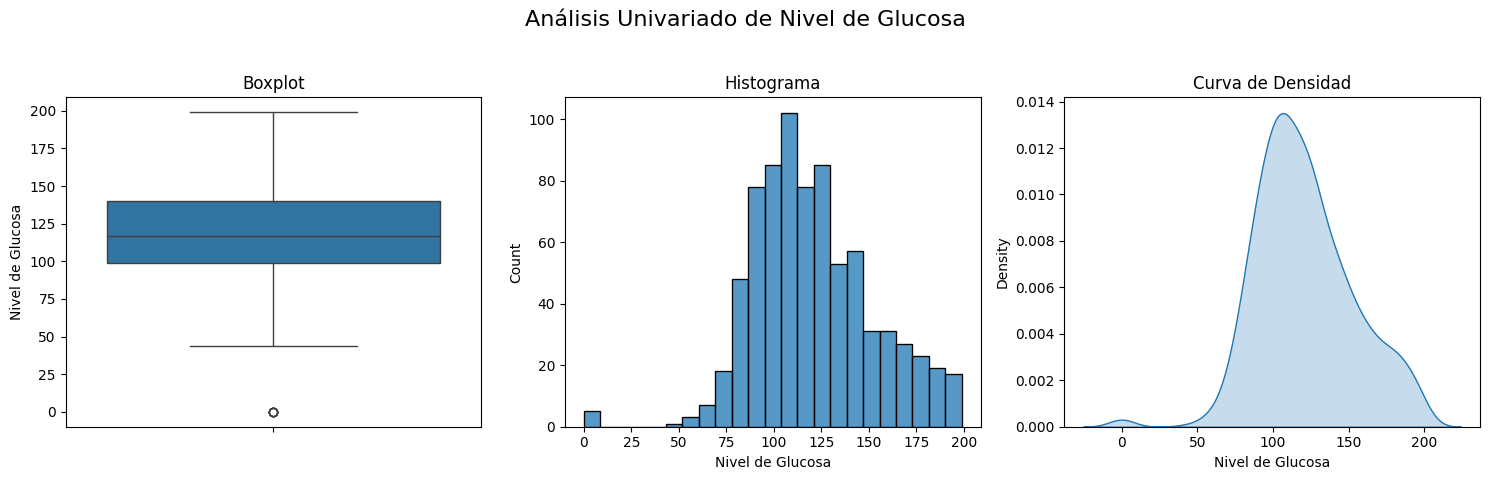

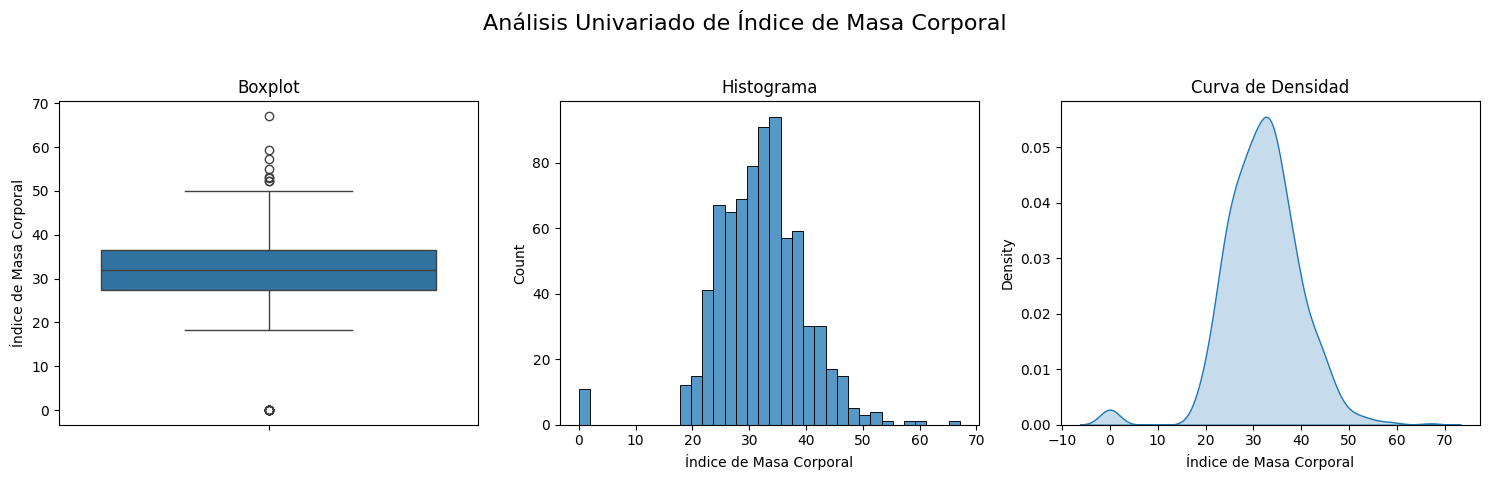

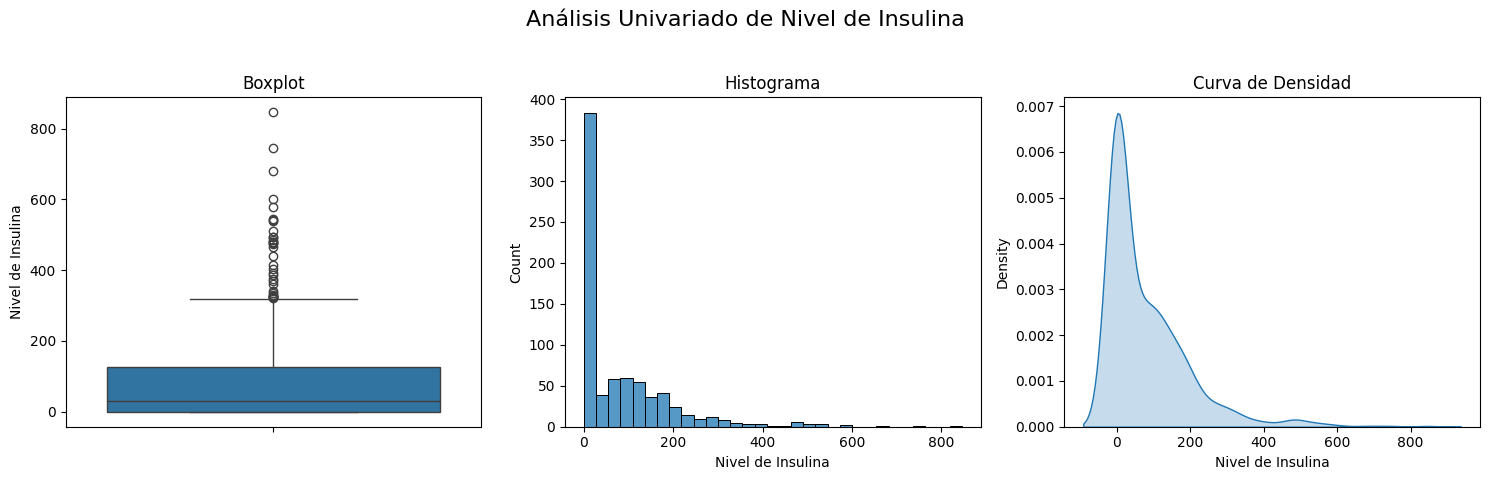

In [12]:
# 3. Análisis de Glucosa
plot_univariate_analysis("Glucose", "Nivel de Glucosa")

# 4. Análisis de BMI (Índice de Masa Corporal)
plot_univariate_analysis("BMI", "Índice de Masa Corporal")

# 5. Análisis de Insulina (¡Notarás muchos outliers aquí!)
plot_univariate_analysis("Insulin", "Nivel de Insulina")

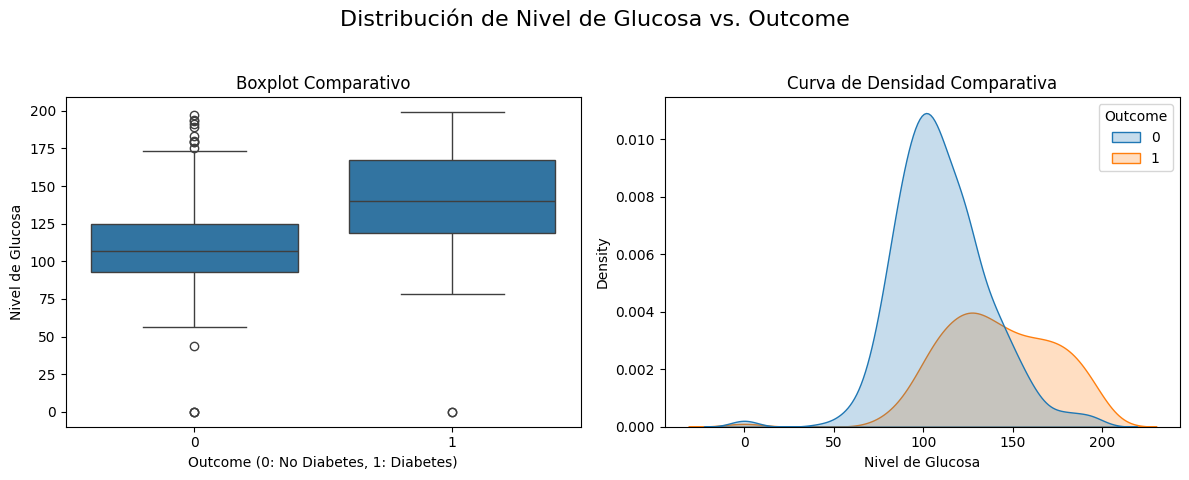

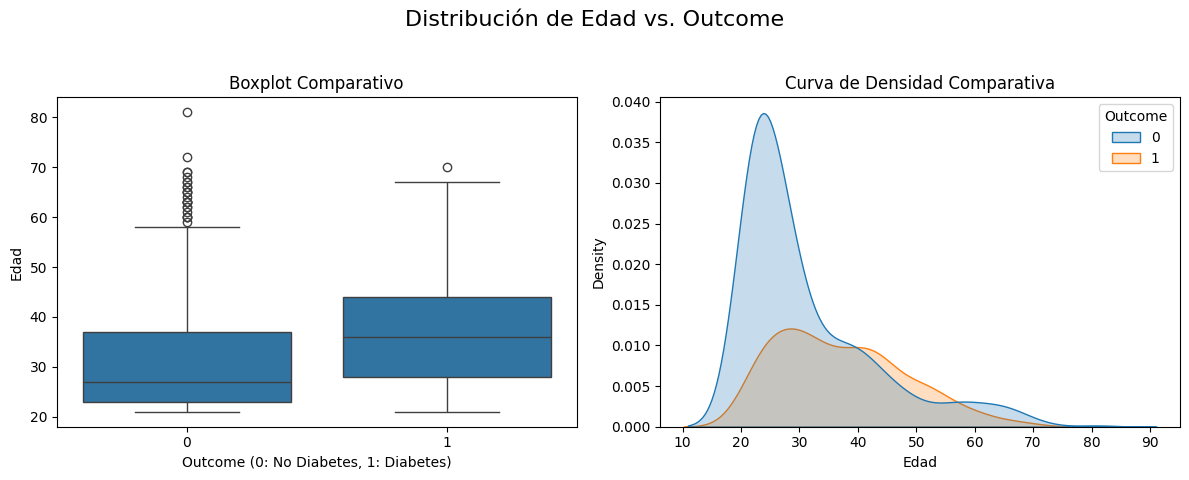

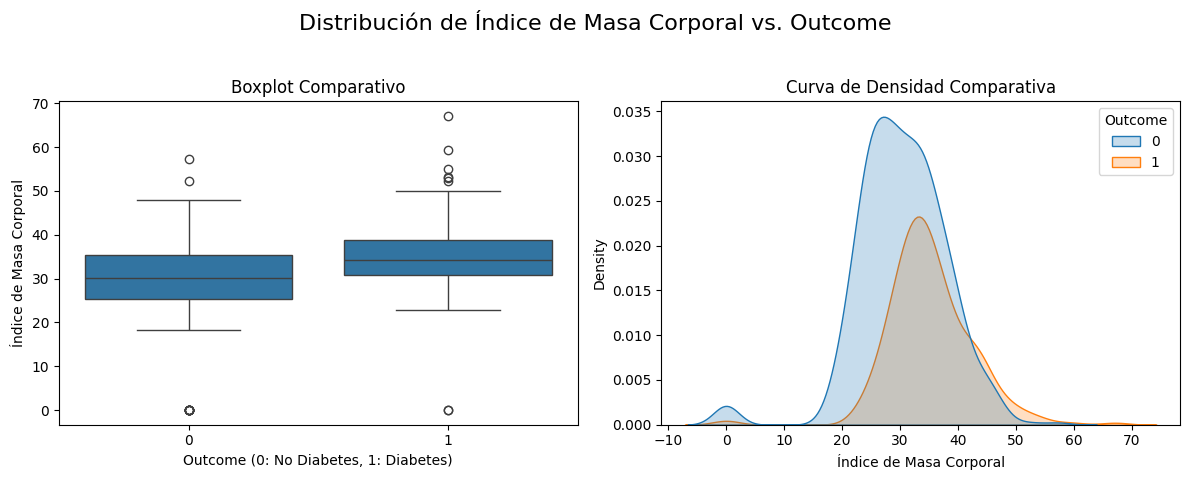

In [13]:
# 6. Comparativa de Glucosa vs Outcome
plot_feature_vs_outcome("Glucose", "Nivel de Glucosa")

# 7. Comparativa de Edad vs Outcome
plot_feature_vs_outcome("Age", "Edad")

# 8. Comparativa de BMI vs Outcome
plot_feature_vs_outcome("BMI", "Índice de Masa Corporal")

C:\Users\nefth\AppData\Local\Temp\ipykernel_13884\176757341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Outcome', y='Glucose', palette='muted')


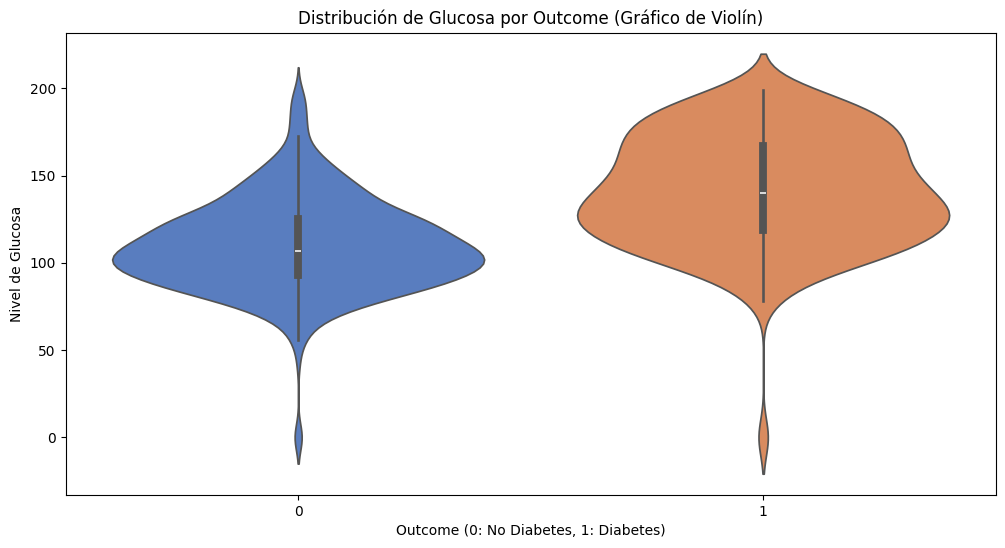

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Outcome', y='Glucose', palette='muted')
plt.title('Distribución de Glucosa por Outcome (Gráfico de Violín)')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Nivel de Glucosa')
plt.show()

# Feature Transformation